In [1]:
from headers import *
import pandas as pd
import numpy as np
from utils.custom_train_test_split import *
import matplotlib.pyplot as plt
import json
from analysis.training_helper import trainPipeline, drawFrom1results

In [2]:
cutoffs = [0.0, 0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 0.15, 0.20, 0.25, 0.35]
files = ['../data/combined_inner_ticker.csv', '../data/extra-data/combined_inner_ticker.csv']
thresholds = [70, 80, 90, 95]

Year split splitDate='30-06-2021'

In [3]:
trainDf, testDf = per_year_train_test_split(files)
resultsToPlot = trainPipeline(cutoffs, yAlpha, trainDf, testDf, thresholds)
balancedResults = trainPipeline(cutoffs, yAlpha, trainDf, testDf, thresholds, isBalanced=True)

-----------------
% of True in dataset 49.72% resulted in 24.04% and median 16.89%
MODEL tree
For alpha1Year, yCutoff = 0.0, taken used - 6037 is 46.96%
Mean was 3.43%, median was 0.35%
MODEL svc
For alpha1Year, yCutoff = 0.0, taken used - 2170 is 16.88%
Mean was 5.94%, median was 0.96%
% of True taken with threshold 70 adjustment -  3857
For threshold data - mean was 3.98%, median was 0.11%
% of True taken with threshold 80 adjustment -  2571
For threshold data - mean was 5.58%, median was 0.49%
% of True taken with threshold 90 adjustment -  1286
For threshold data - mean was 6.87%, median was 1.37%
% of True taken with threshold 95 adjustment -  643
For threshold data - mean was 4.18%, median was -2.7%
-----------------
-----------------
% of True in dataset 48.22% resulted in 24.78% and median 17.55%
MODEL tree
For alpha1Year, yCutoff = 0.01, taken used - 5998 is 46.660000000000004%
Mean was 4.02%, median was 0.64%
MODEL svc
For alpha1Year, yCutoff = 0.01, taken used - 1017 is 7.91

In [7]:
with open('./finalPlot-year.json', 'w') as f:
    json.dump(resultsToPlot, f, default=float)
with open('./finalPlotBalanced-year.json', 'w') as f:
    json.dump(resultsToPlot, f, default=float)

In [3]:
with open('./finalPlot-year.json', 'r') as f:
    resultsToPlot = json.load(f)
with open('./finalPlotBalanced-year.json', 'r') as f:
    resultsToPlotBalanced = json.load(f)

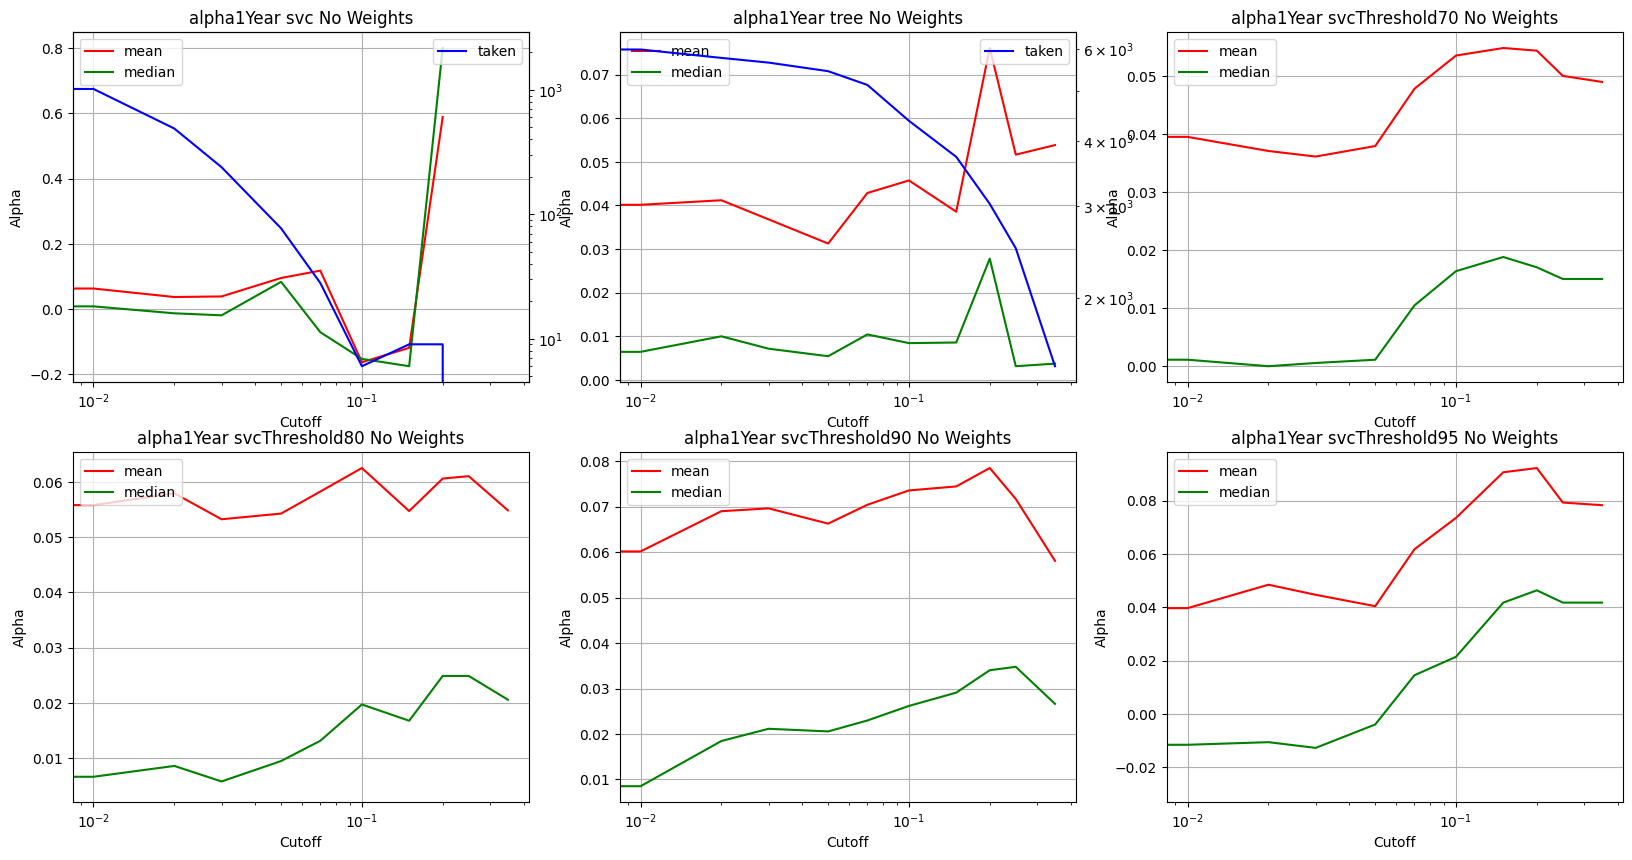

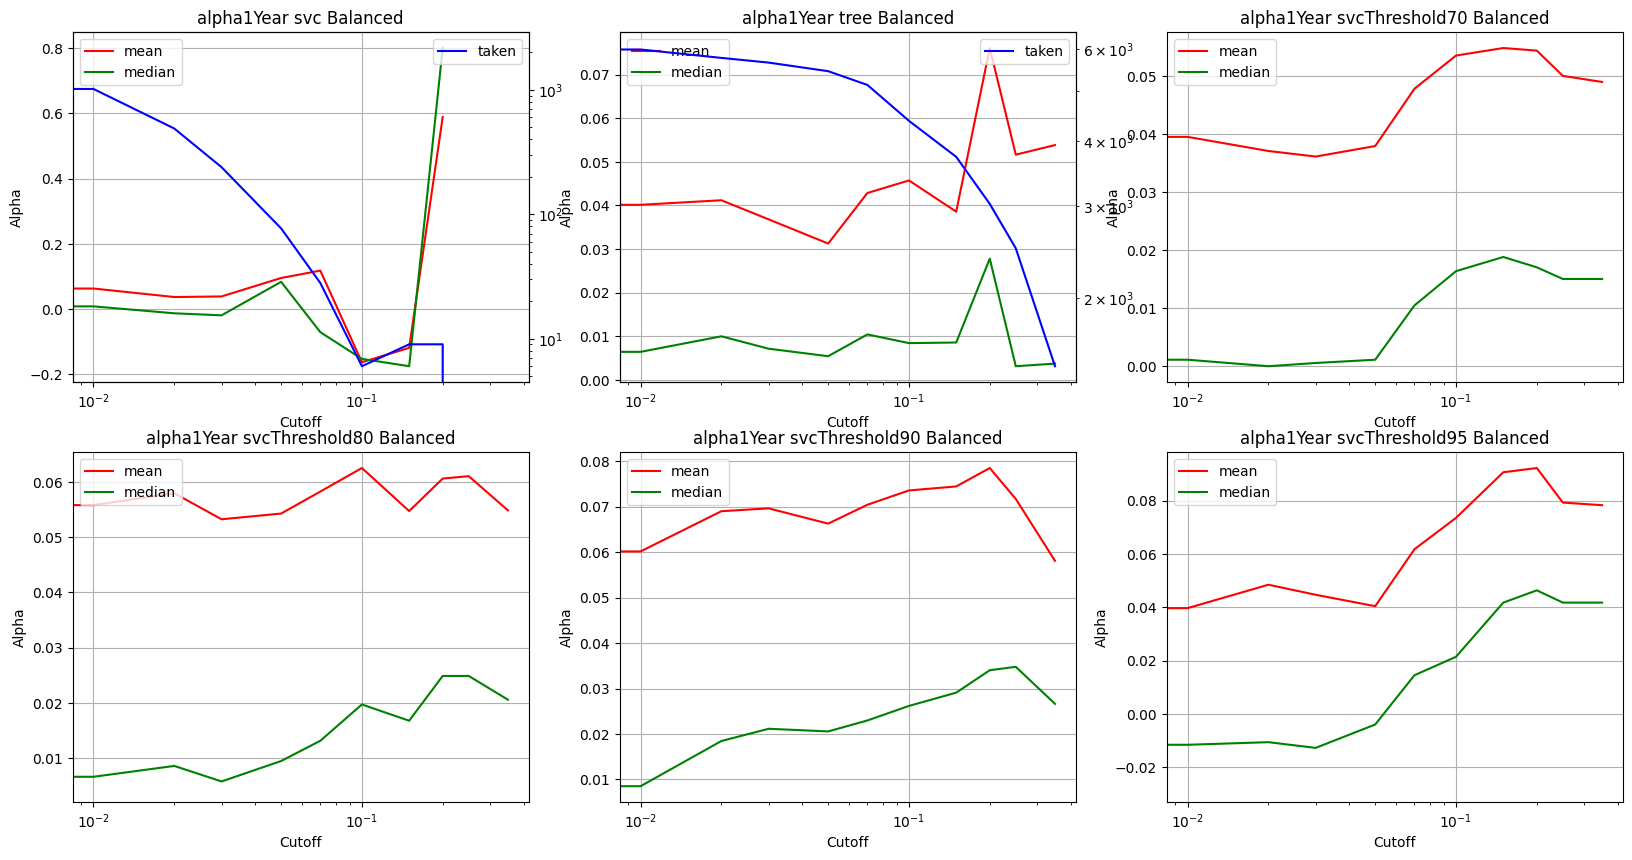

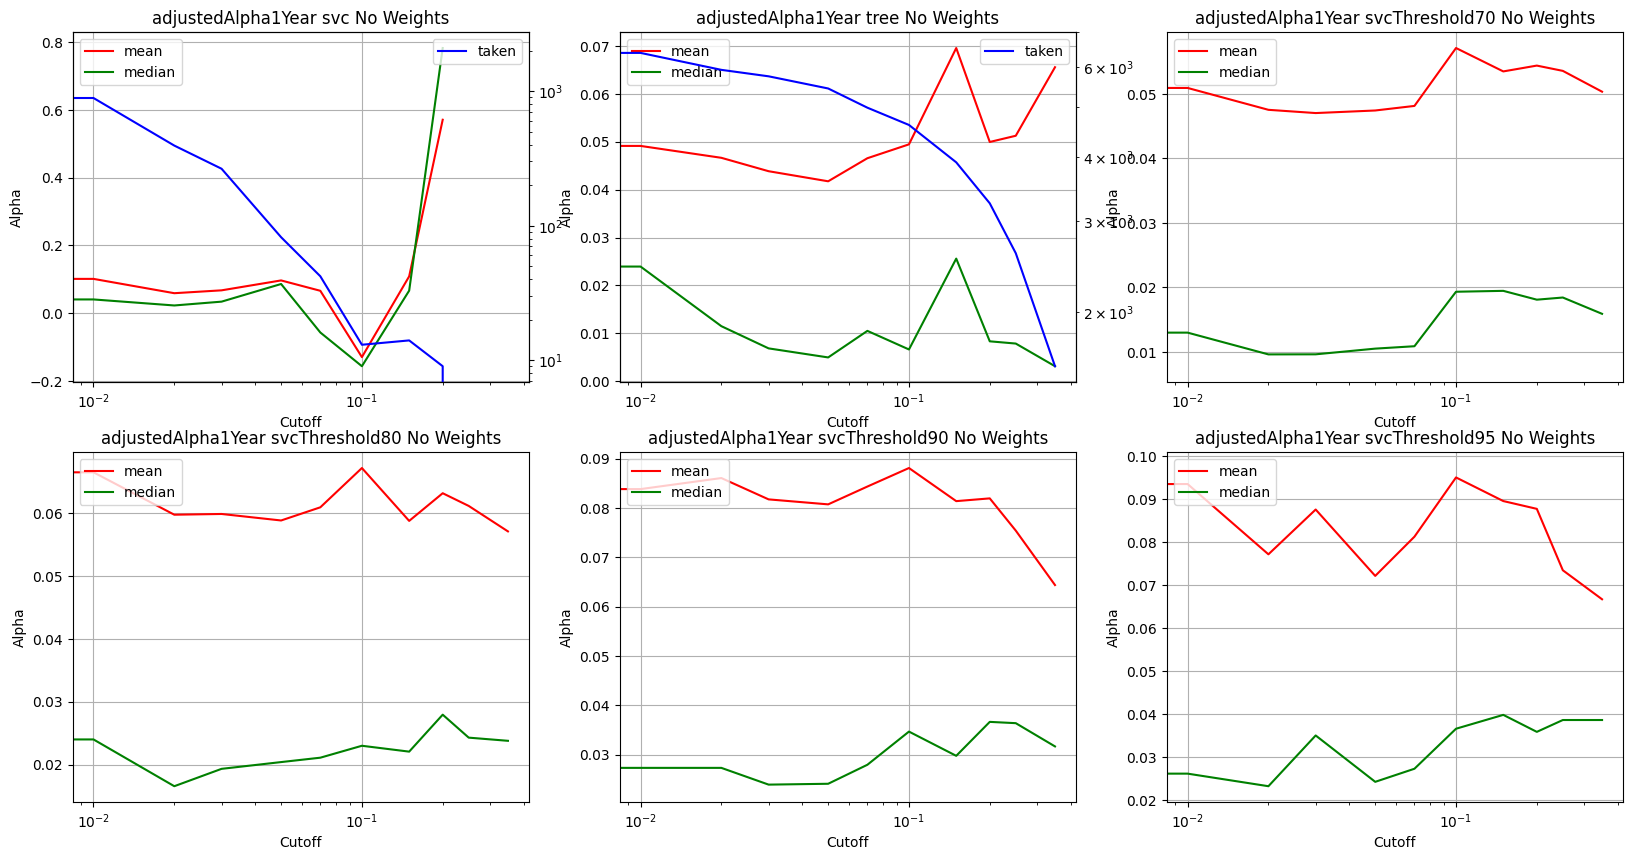

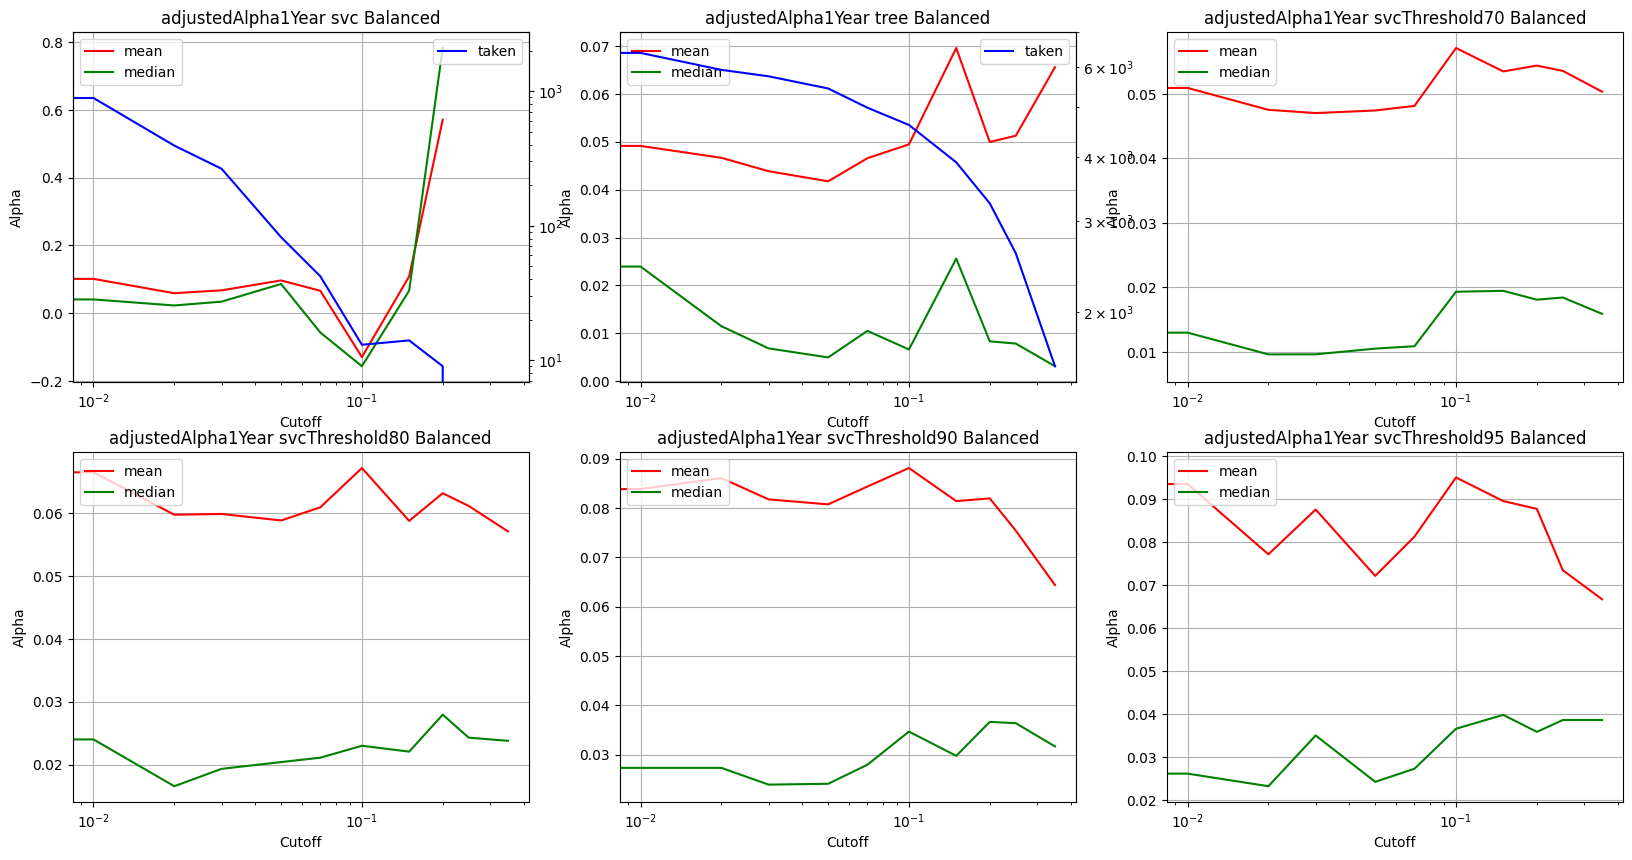

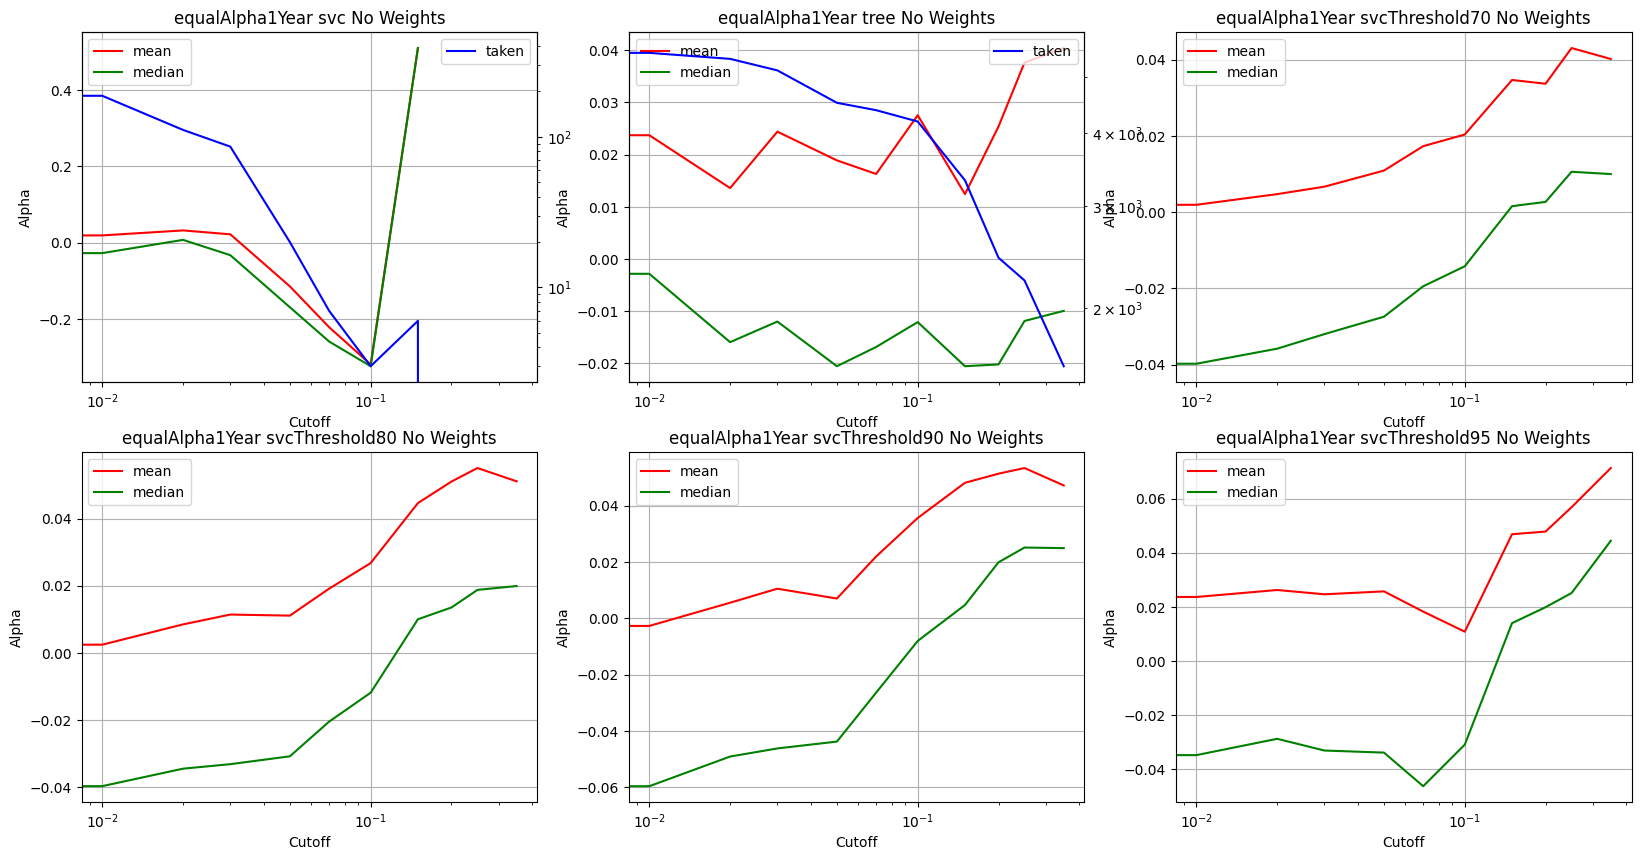

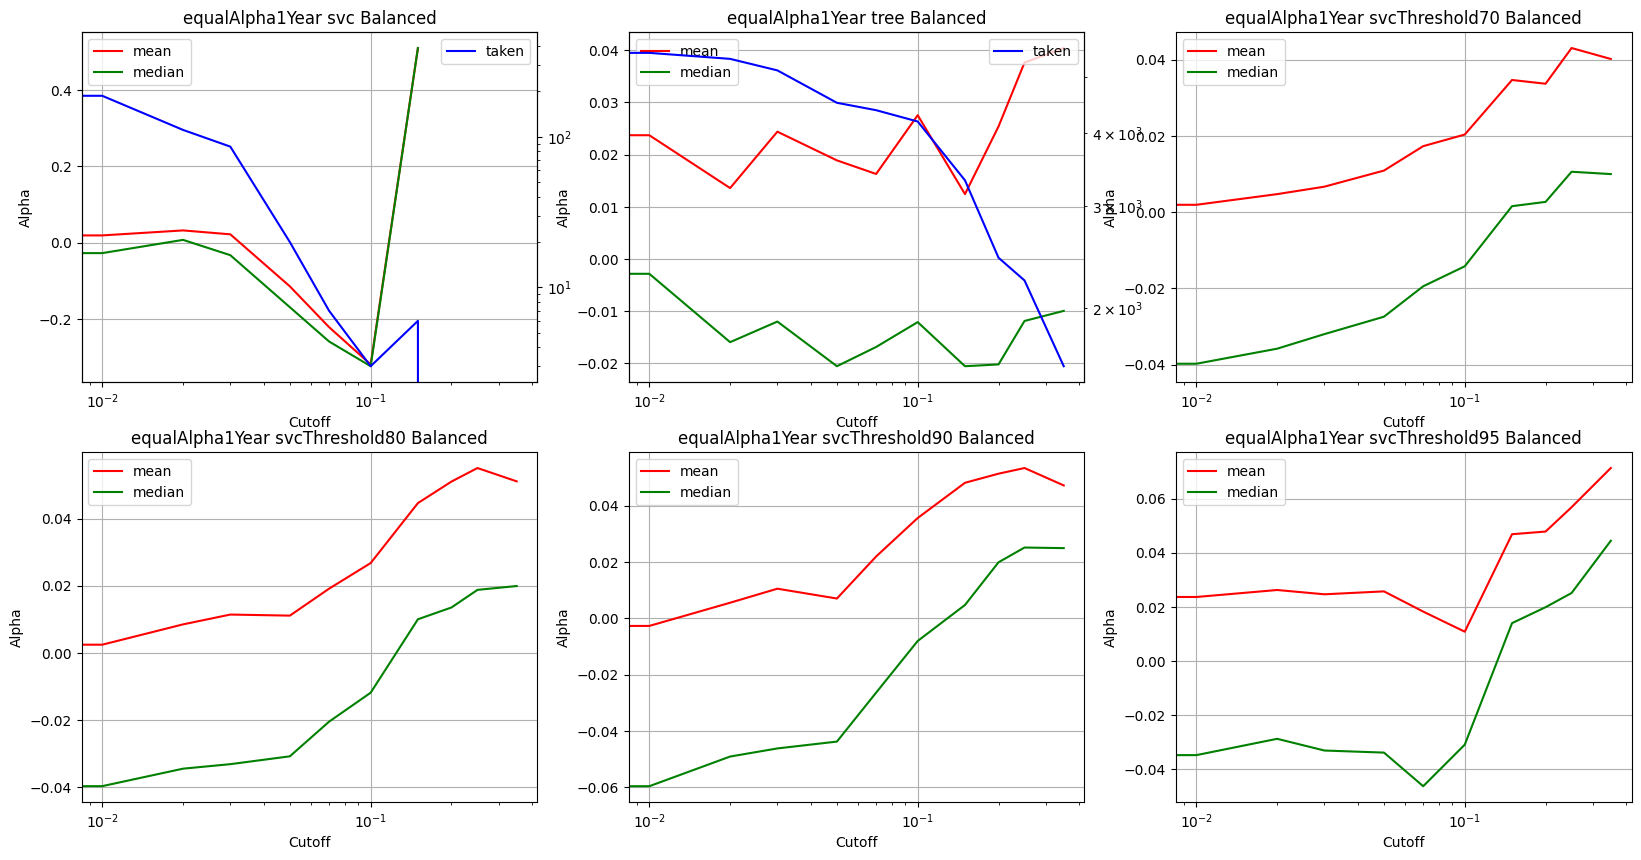

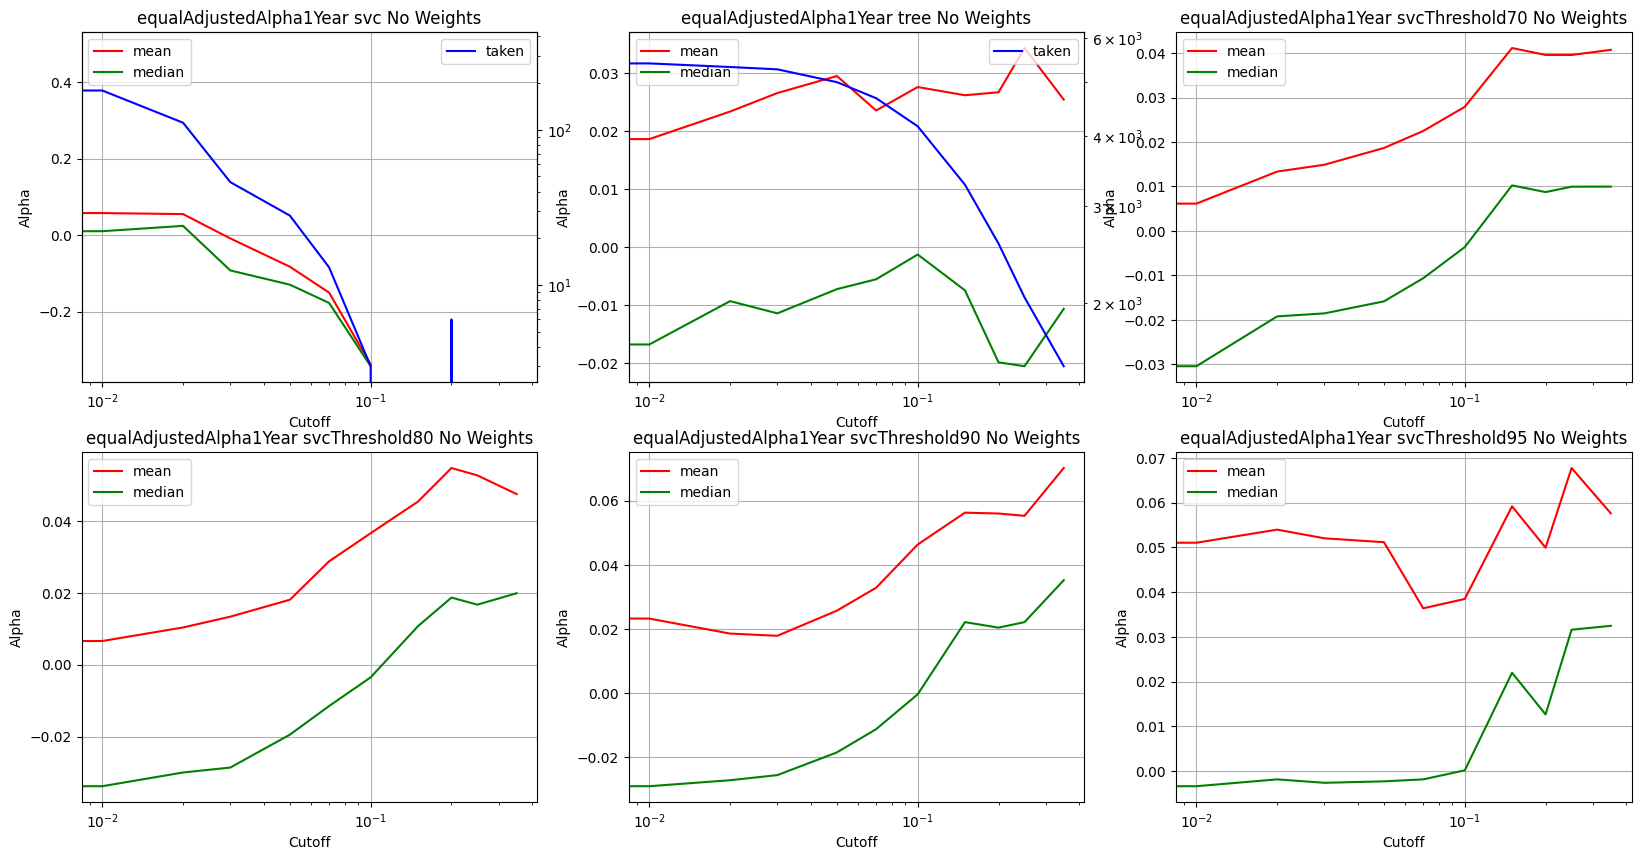

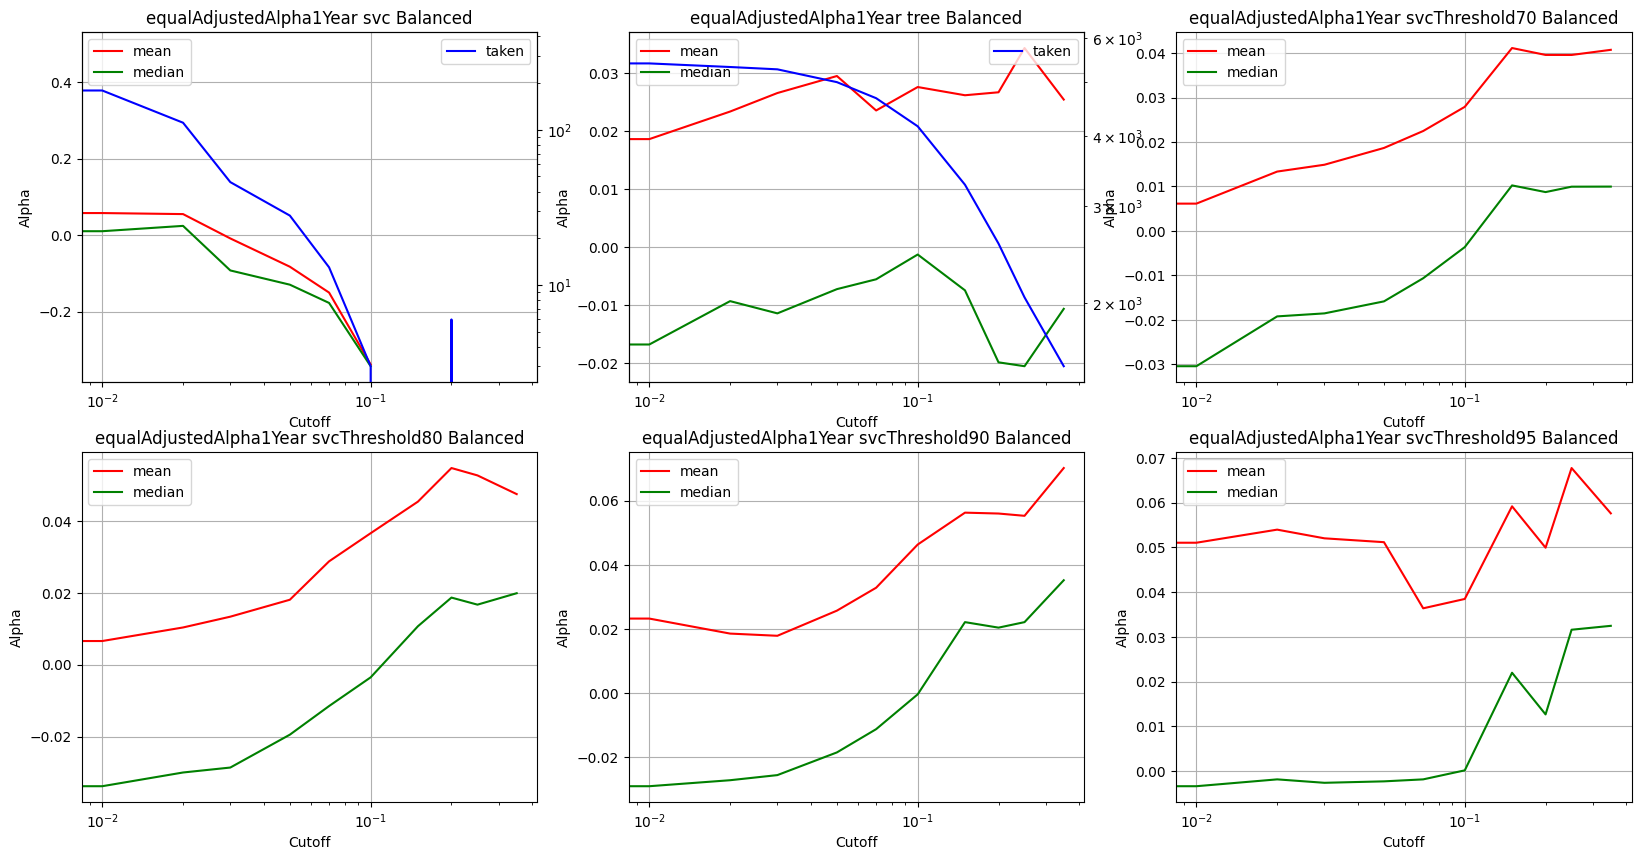

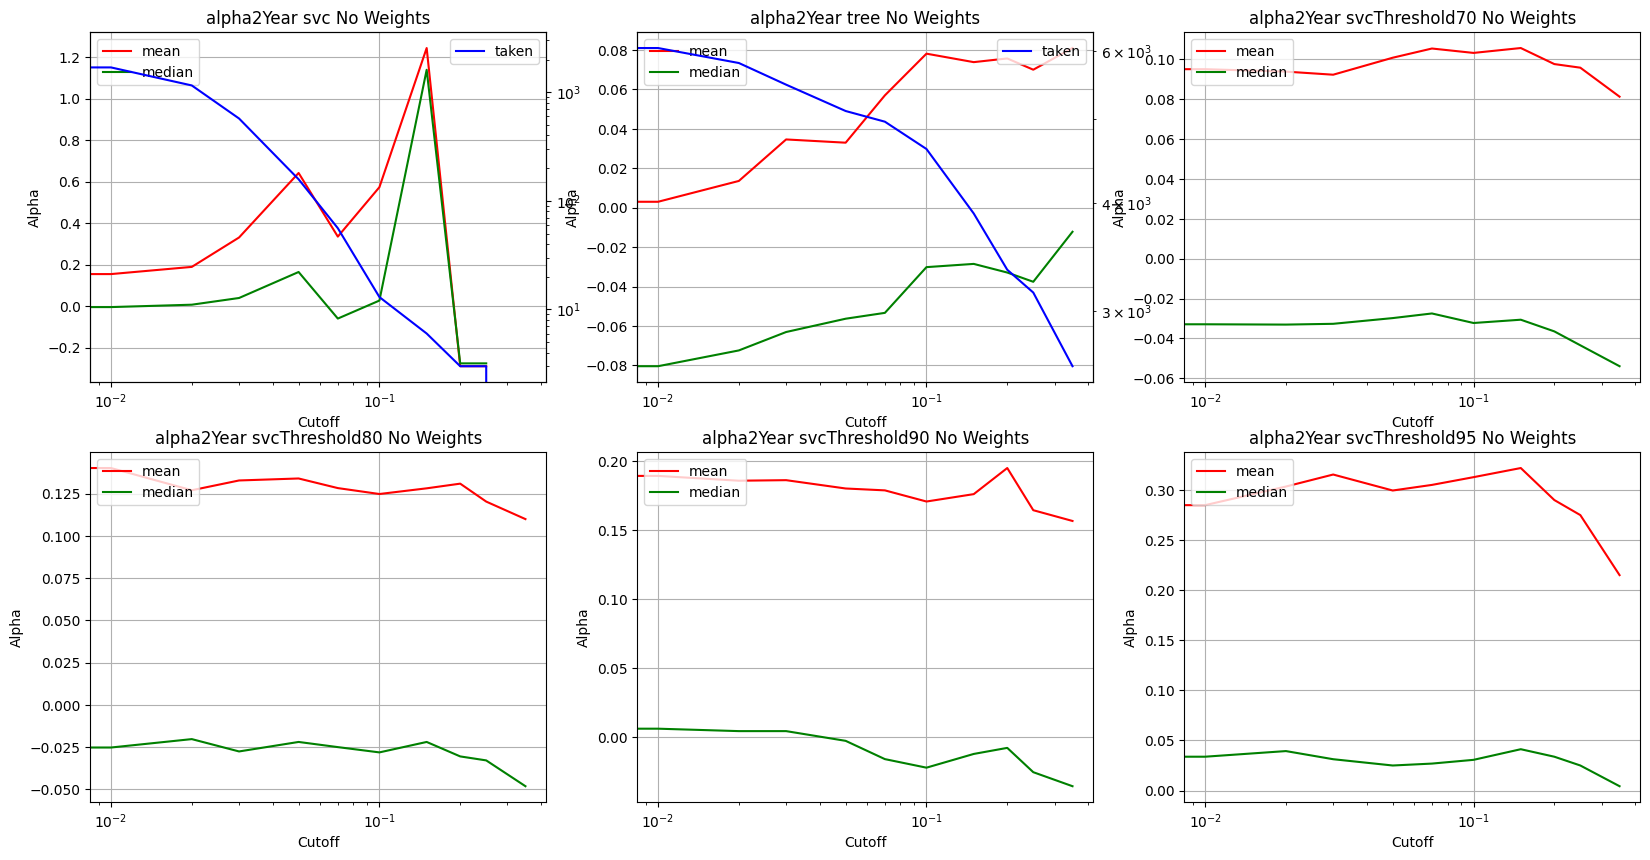

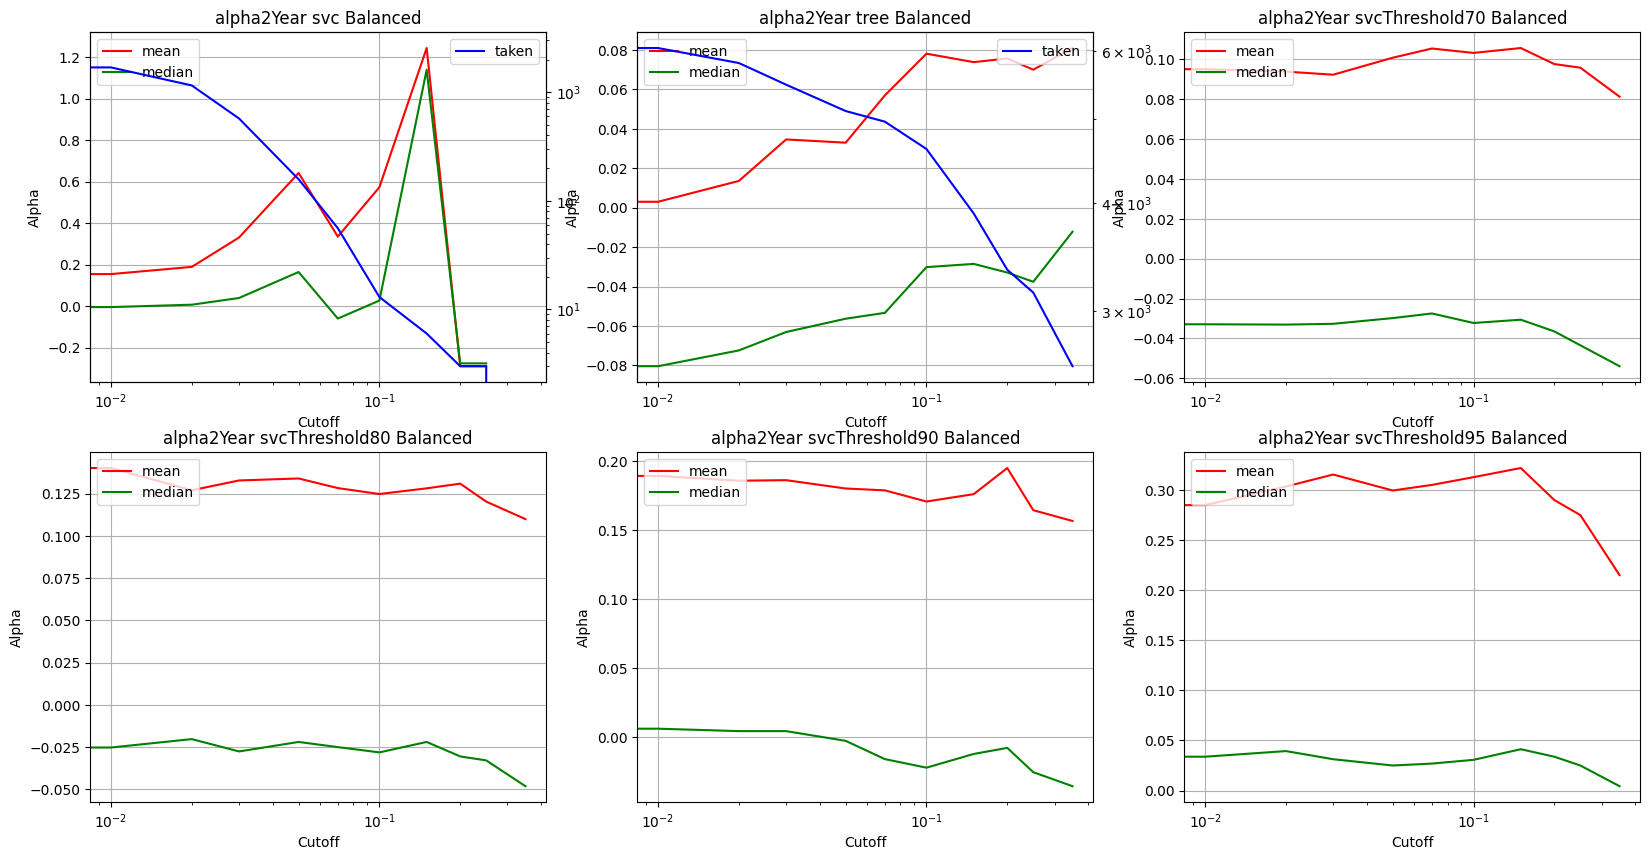

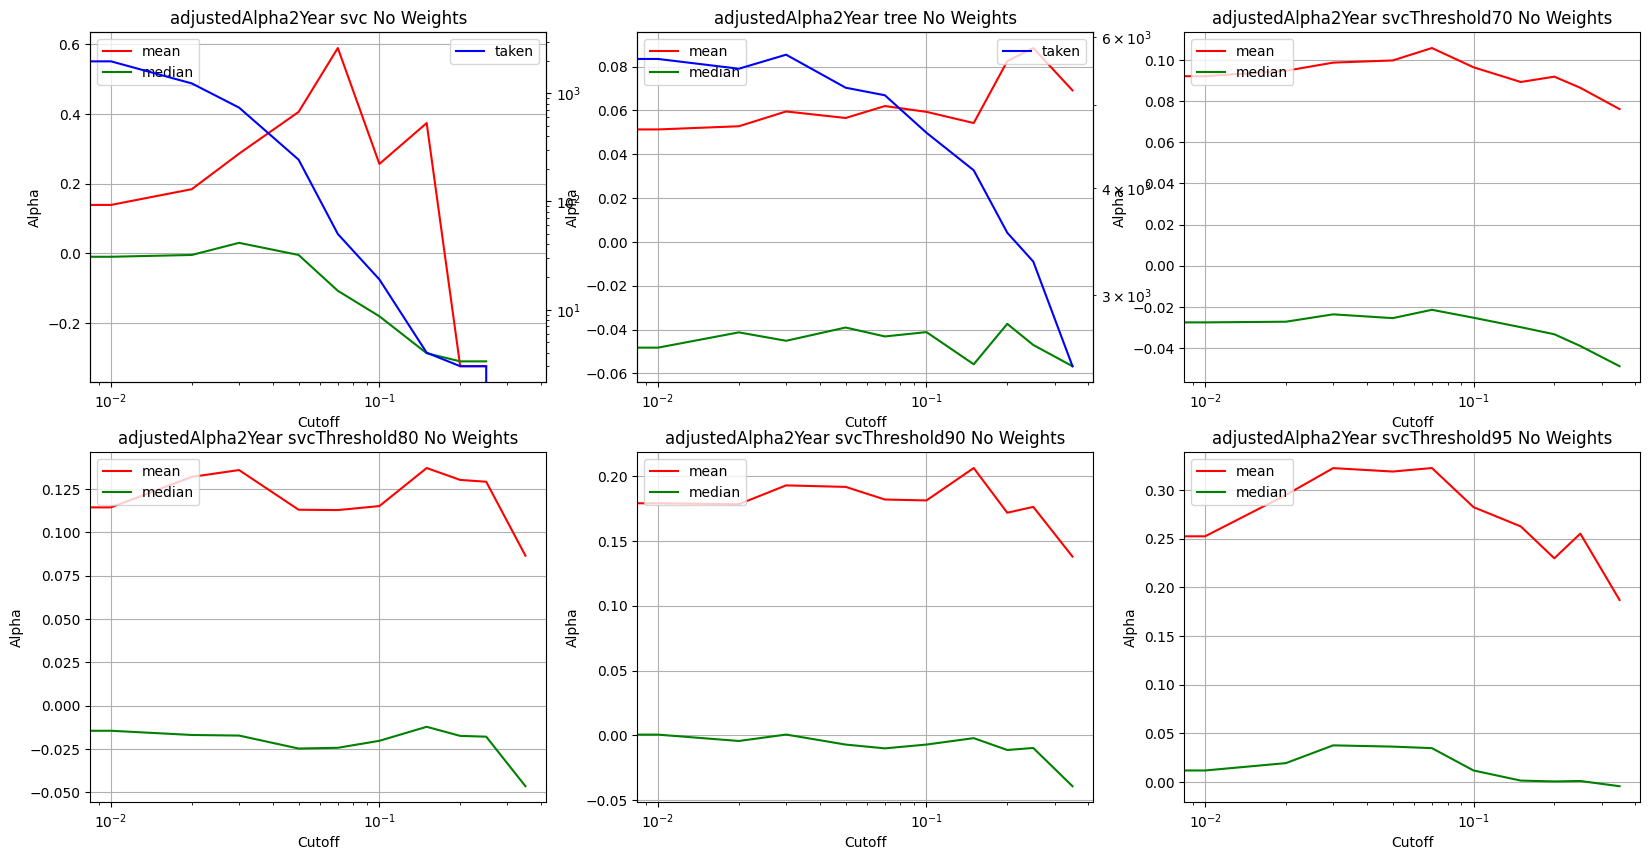

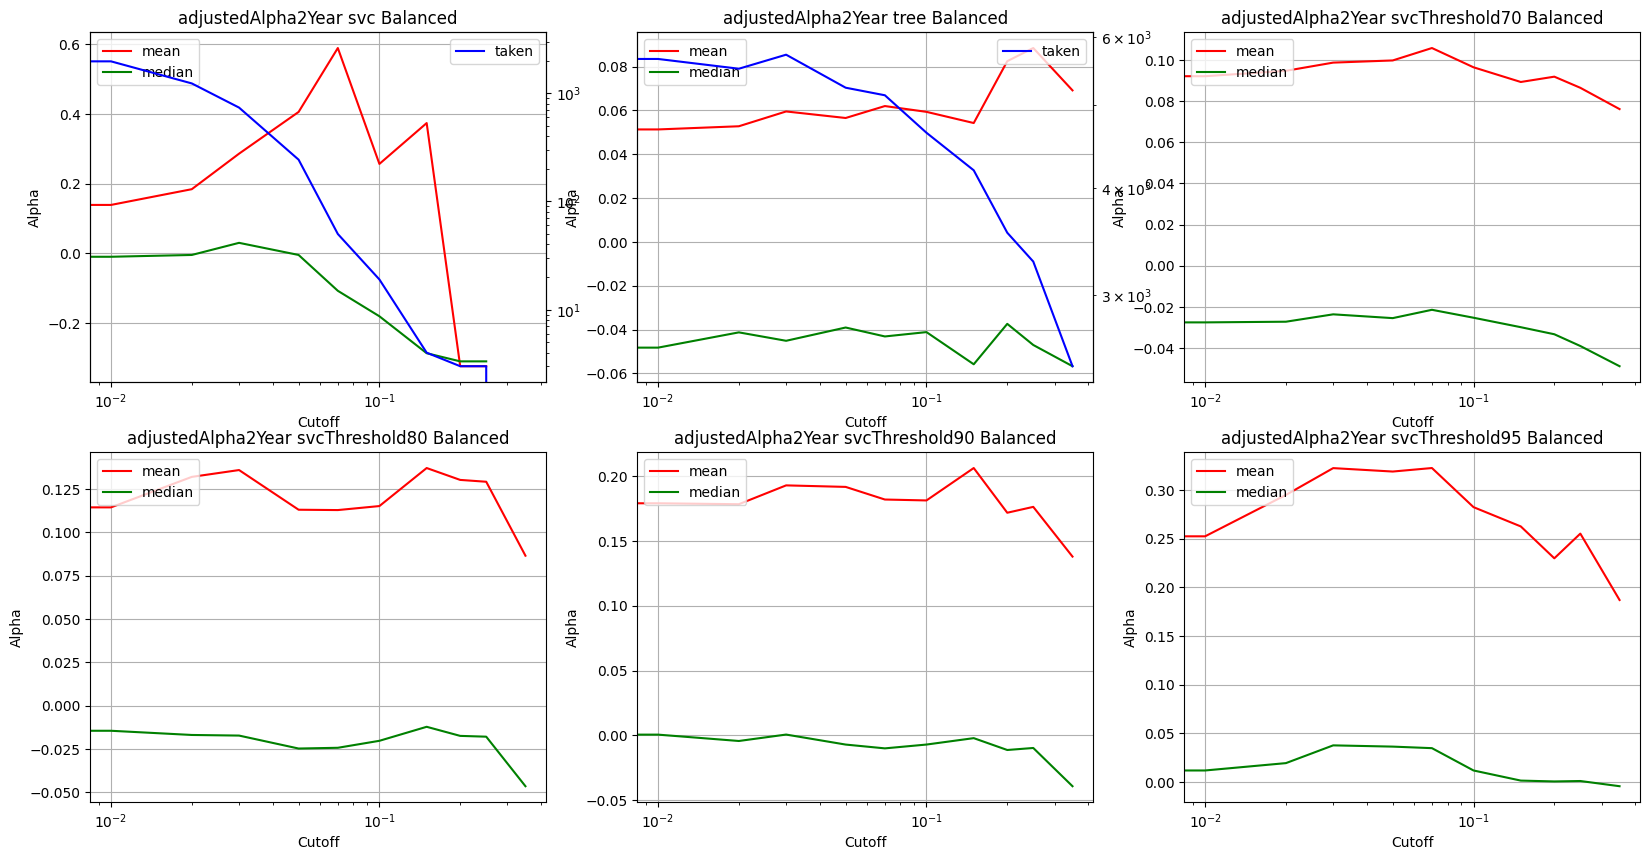

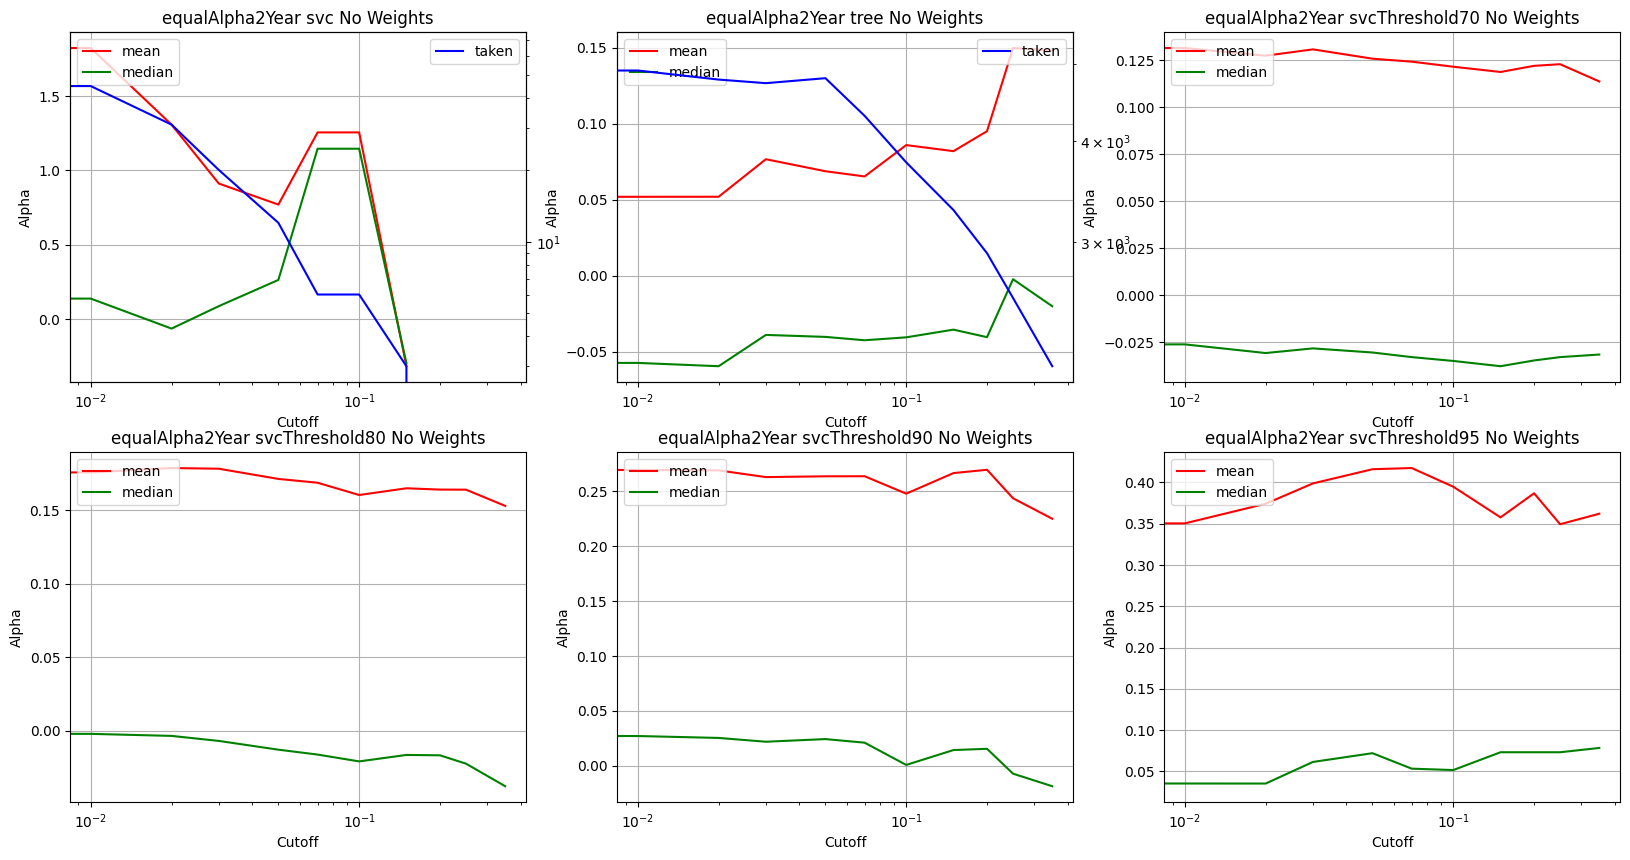

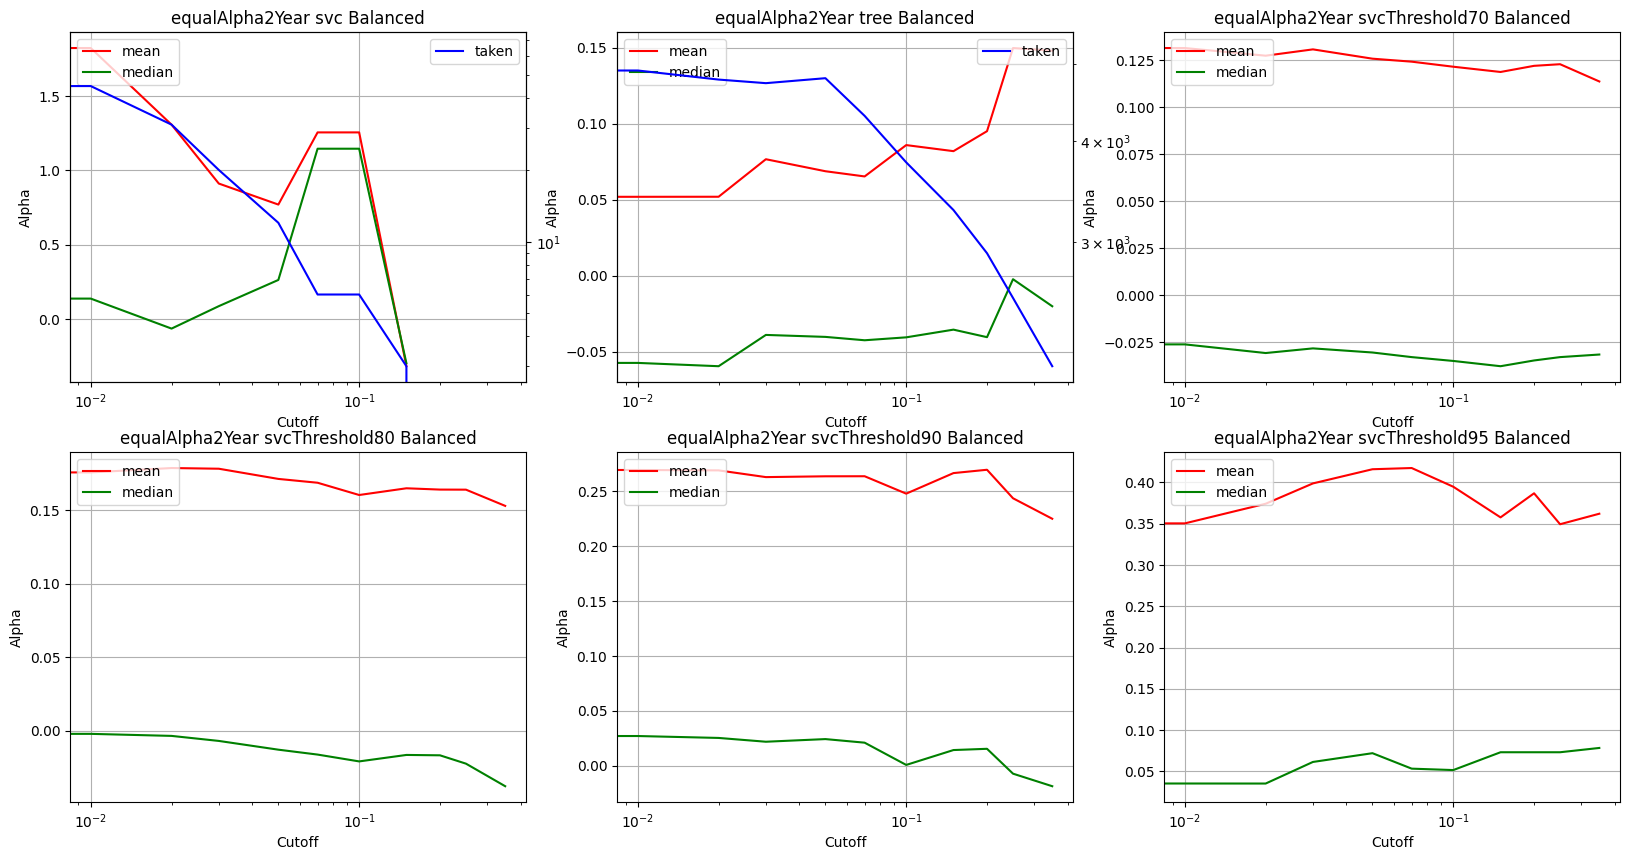

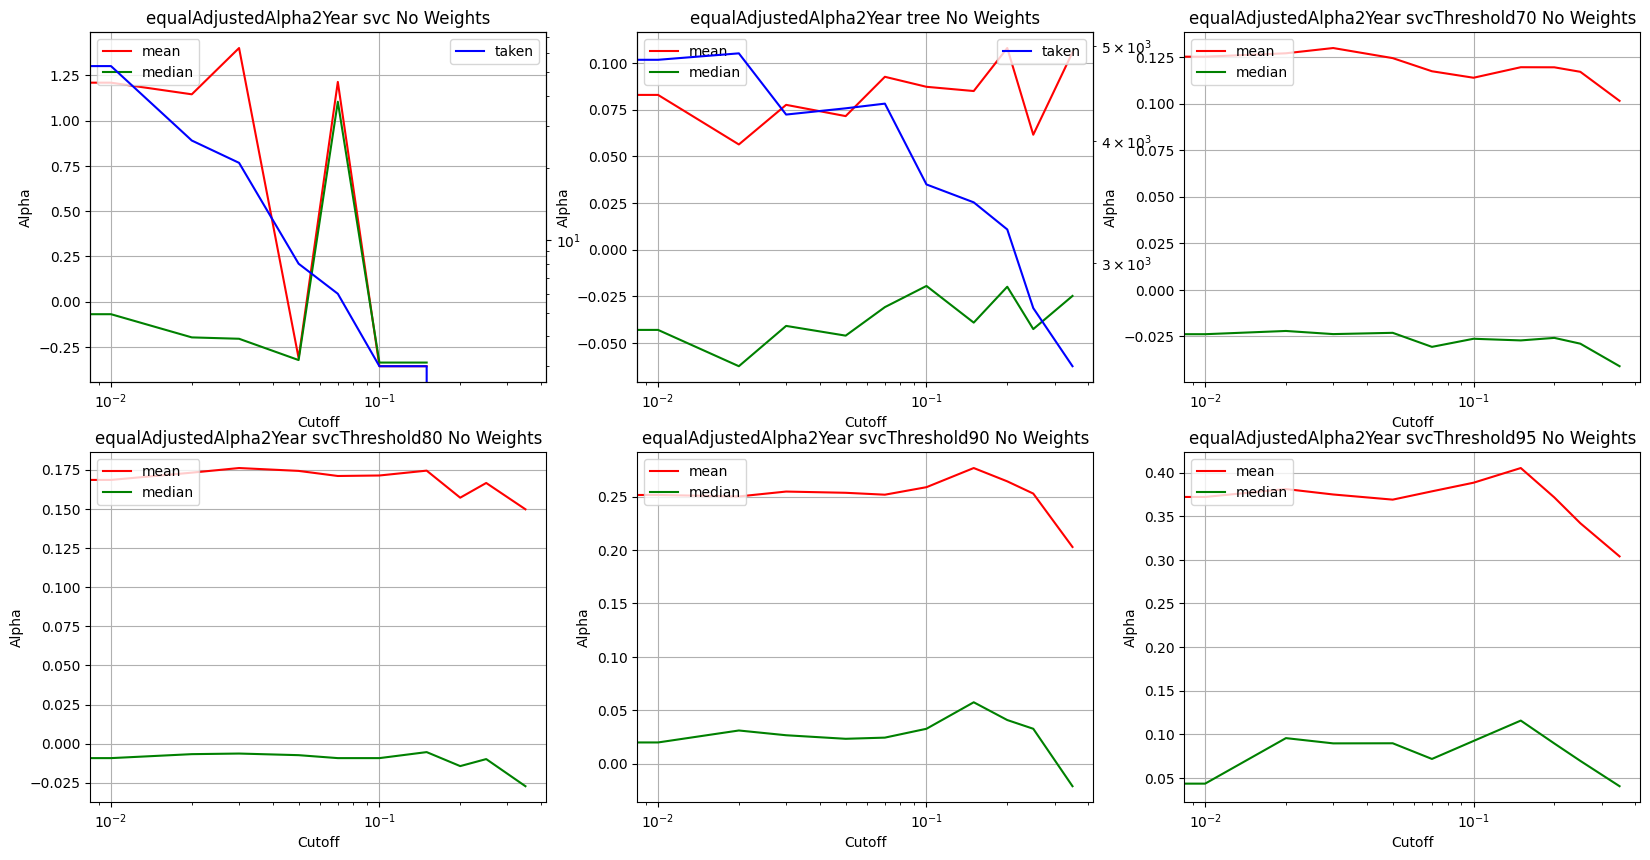

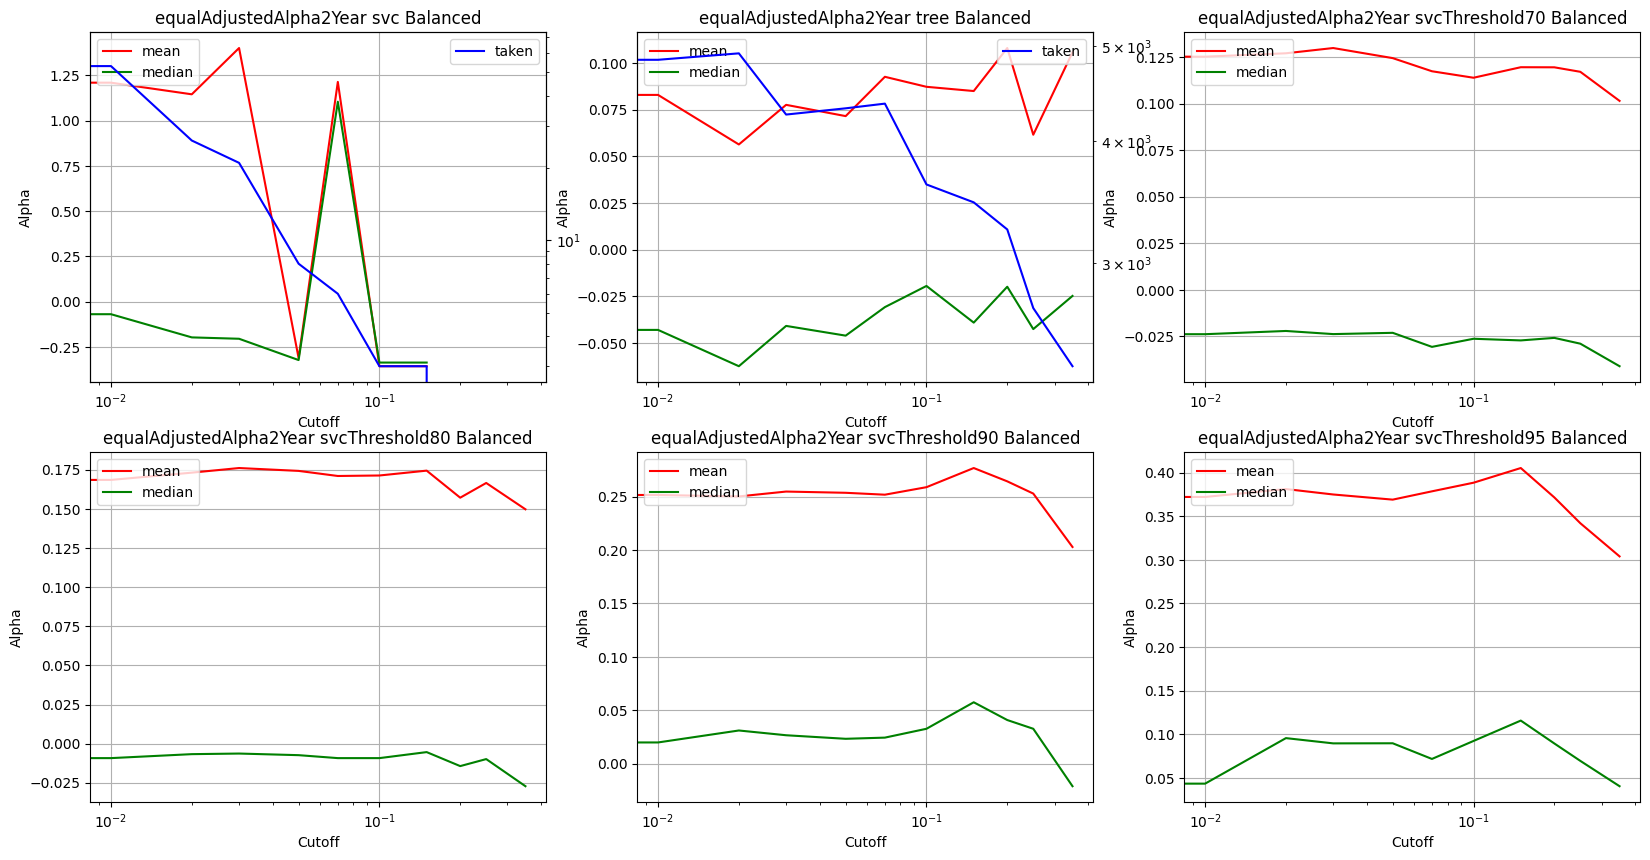

In [4]:
for yLabel in resultsToPlot.keys():
    thresholdKeys = [f'svcThreshold{threshold}' for threshold in thresholds]
    toPlot = resultsToPlot[yLabel]

    drawFrom1results(resultsToPlot[yLabel], yLabel, cutoffs, title='No Weights', keys=['svc', 'tree', *thresholdKeys])
    plt.show()
    
    drawFrom1results(resultsToPlotBalanced[yLabel], yLabel, cutoffs, title='Balanced', keys=['svc', 'tree', *thresholdKeys])
    plt.show()
